In [1]:
import pandas as pd

# Load engineered dataset
df = pd.read_csv("../data/processed/engineered_features.csv")

# Check data
print("Shape:", df.shape)
df.head()


Shape: (1848, 14)


,line,station,hour,day_of_week,is_weekend,is_peak_hour,crowd_level,is_morning,is_evening,is_office_hour,station_enc,day_enc,line_enc,crowd_enc
0,Western,Andheri,0,Monday,0,0,Low,0,0,0,0,1,2,2
1,Western,Andheri,1,Monday,0,0,Low,0,0,0,0,1,2,2
2,Western,Andheri,2,Monday,0,0,Low,0,0,0,0,1,2,2
3,Western,Andheri,3,Monday,0,0,Low,0,0,0,0,1,2,2
4,Western,Andheri,4,Monday,0,0,Low,0,0,0,0,1,2,2


In [2]:
from sklearn.model_selection import train_test_split

# Select feature columns
feature_cols = [
    "hour",
    "is_weekend",
    "is_peak_hour",
    "is_morning",
    "is_evening",
    "is_office_hour",
    "station_enc",
    "line_enc",
    "day_enc"
]

X = df[feature_cols]
y = df["crowd_enc"]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (1848, 9)
y shape: (1848,)


In [3]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (1478, 9)
Testing set size: (370, 9)


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=150,
    max_depth=8,              # LIMIT tree depth
    min_samples_leaf=5,       # avoid tiny leaf nodes
    random_state=42,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)


,n_estimators,150
,criterion,'gini'
,max_depth,8
,min_samples_split,2
,min_samples_leaf,5
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [8]:
# Make Predictions on Test Data
# Predict on test set
y_pred = rf_model.predict(X_test)

print("Predictions completed!")
y_pred[:10]


Predictions completed!


array([2, 2, 2, 3, 1, 3, 3, 3, 3, 2])

Model Evaluation

Accuracy: 0.978

Classification Report:

              precision    recall  f1-score   support

           0       0.78      1.00      0.88        28
           1       1.00      0.84      0.91        49
           2       1.00      1.00      1.00       172
           3       1.00      1.00      1.00       121

    accuracy                           0.98       370
   macro avg       0.94      0.96      0.95       370
weighted avg       0.98      0.98      0.98       370



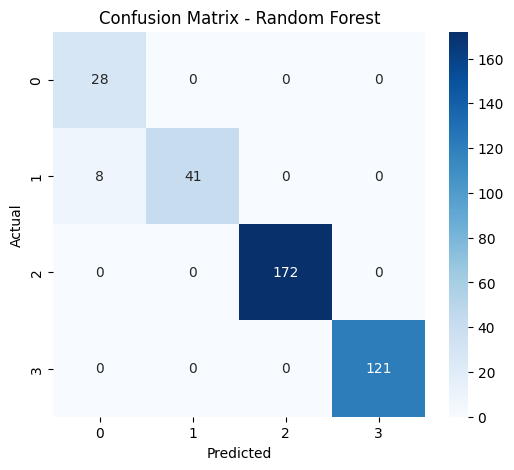

In [9]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy, 3))

# Classification report (Precision, Recall, F1-score)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()
